In [3]:
import torch
import torch.nn as nn
from res.plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis
import matplotlib.pyplot as plt
import numpy as np

# Linear Algebra in PyTorch and numpy

Inspired by 3Blue1Brown, Alfredo Canziani, and the books _Mathematics for Machine Learning_ and _Deep Learning by Ian Goodfellow_

In [4]:
set_default()

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Linear Combinations, Span, and Basis

Let $\boldsymbol{\hat{\imath}} = \pmatrix{1 & 0}^\top$ and  $\boldsymbol{\hat{\jmath}} = \pmatrix{0 & 1}^\top$. These are also called *unit vectors* (i.e. vectors with all elements equal to zero, except one element which is equal to one).

Then, $\boldsymbol{\hat{\imath}}$ and $\boldsymbol{\hat{\jmath}}$ are the **basis vectors** of any $xy$ coordinate system or $\mathbb R^2$. That is, they are what define the common features of a coordinate system, the same way that the interval between each integer in $\mathbb R$ is "one". 
   - Is $\hat{i}$ and $\hat{j}$ of a 2d vector
   - 3d is $\hat{i}$, $\hat{j}$ and $\hat{k}$

Any vector $\mathbf{x}$ in $\mathbb R^2$ can be interpreted as a **linear combination** of $\boldsymbol{\hat{\imath}}$ and $\boldsymbol{\hat{\jmath}}$, such that $\mathbf{x} = a \boldsymbol{\hat{\imath}} + b \boldsymbol{\hat{\jmath}}$, for some values of $a$ and $b$.

A **span** is the set of all possible vectors that can be reached with the linear combinations of any *given* vectors. For example, the span of most pairs of two-dimensional vectors is $\mathbb R^2$, unless they are *collinear* (or *linearly dependent*), in which case the span is just $\mathbb R$.
 - The span of $\vec{v}$ and $\vec{w}$ is the set of all their possible linear combinations
 - Let the scalars $a$ and $b$ be all real numbers
 - Scaling two vectors by a "scalar" is called a linear combination between those two vectors

The space spanned by a set of vectors in $\mathbb{R}^K$ has at most $K$ dimensions. If this space has fewer than $K$ dimensions, it is a **subspace**, or *hyperplane.* Every set of vectors spans some space; it may be the entire space in which the vectors reside, or it may be some subspace of it. 
 - When it has fewer than $K$ dimensions, think "it has been squashed"

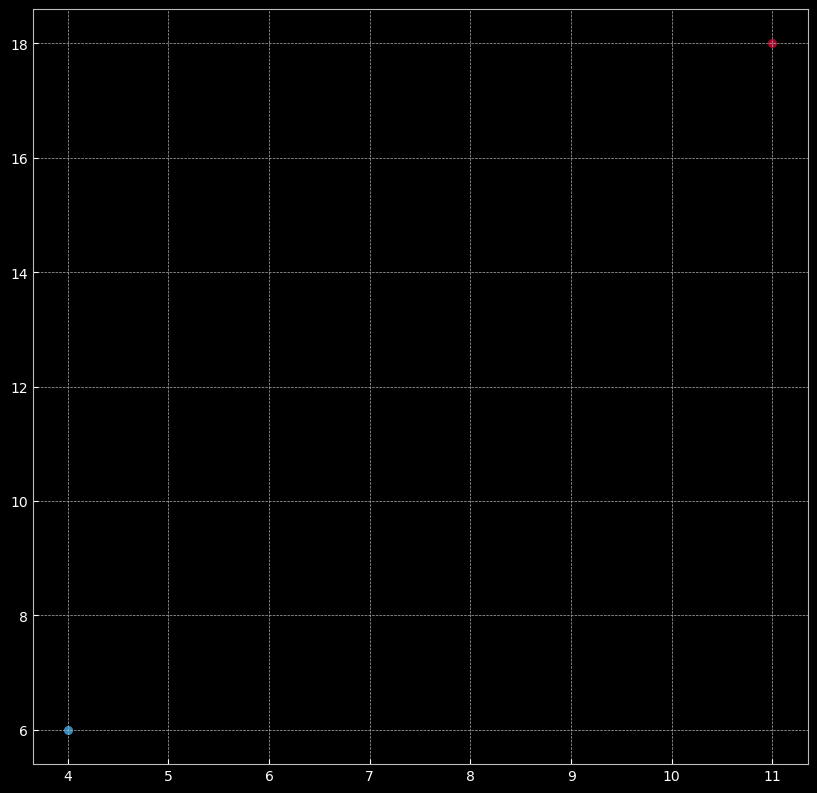

In [6]:
# Scaling - Linear combinations
v = np.array([1, 2])
w = np.array([3, 4])

vw = v + w
plt.scatter(vw[0], vw[1])

a = 5
b = 2

vwScale = a*v + b*w

# Linear combination
plt.scatter(vwScale[0], vwScale[1])
plt.show()

_Note_: The eigenvector is the vector not "knocked off" its span after a linear transformation

### Matrix Multiplication as Linear Transformations

Linear transformations can be described by a matrix by following $\hat{i}$ and $\hat{j}$

Matrices can be better understood as transformations of space: *linear transformations*. Here, "transformation" is a synonym of "function" and "linear" and has the following *visual* interpretation: moving around space such that grid lines remain parallel and evenly spaced, and such that the origin remains fixed. 

The following equation shows how a vector containing $x$ and $y$ is transformed when multiplied by a matrix. 

$$
\begin{pmatrix} a & b \\ c & d \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} = 
x \begin{pmatrix} a \\ c \end{pmatrix} + y \begin{pmatrix} b \\ d \end{pmatrix} =
\begin{pmatrix} ax + by \\ cx + dy \end{pmatrix}
$$

That being said, linear transformations are just functions with vectors as inputs and vectors as outputs. 

Matrix multiplication can also be conceived as a **composition** of distinct transformations, for example:

$$
\underbrace{\begin{pmatrix} 1 & 1 \\ 0 & 1 \end{pmatrix}}_\text{Shear} 
\underbrace{\begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}}_\text{Rotation}
\begin{pmatrix} x \\ y \end{pmatrix} = 
\underbrace{\begin{pmatrix} 1 & -1 \\ 1 & 0 \end{pmatrix}}_\text{Composition} 
\begin{pmatrix} x \\ y \end{pmatrix}
$$

Before transformation tensor([ 0.1137, -1.1903])
After transformation tensor([ 1.2995, -0.0539])


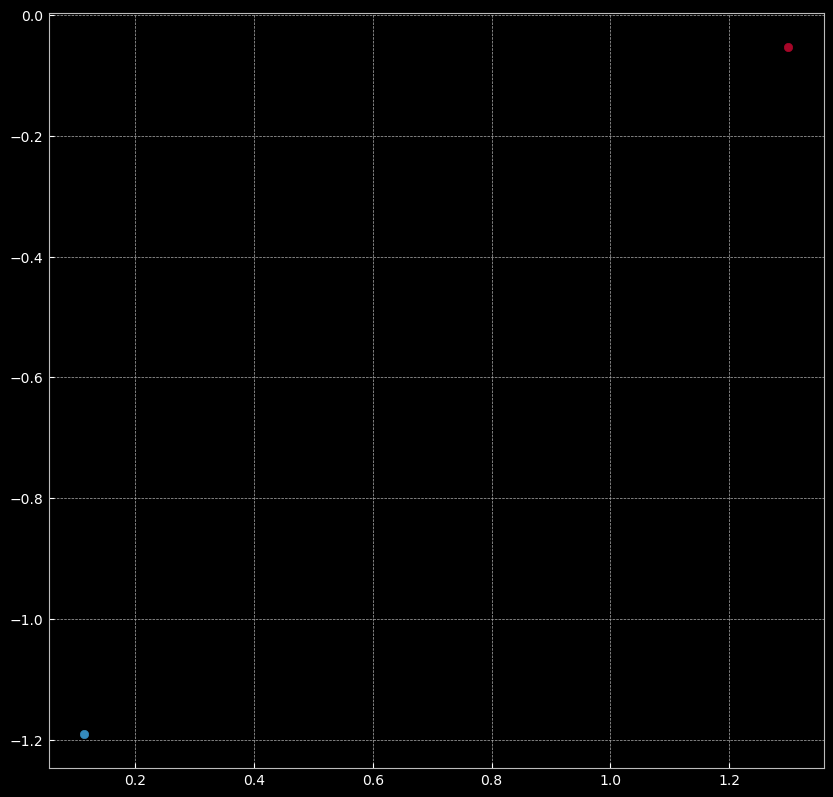

In [22]:
# Matrix-vector transformation
tensorA = torch.randn(2, 2)
tensorx = torch.randn(2)
output = torch.matmul(tensorA, tensorx)

print('Before transformation', tensorx)
print('After transformation', output)

plt.scatter(tensorx[0], tensorx[1])
plt.scatter(output[0], output[1])
plt.show()

tensor([[ 1.5232, -0.2149],
        [-0.2980,  0.7624]])
tensor([[-0.5627,  1.1101],
        [ 0.5926, -0.6144]])


tensor([[-0.9844,  1.8229],
        [ 0.6195, -0.7992]])


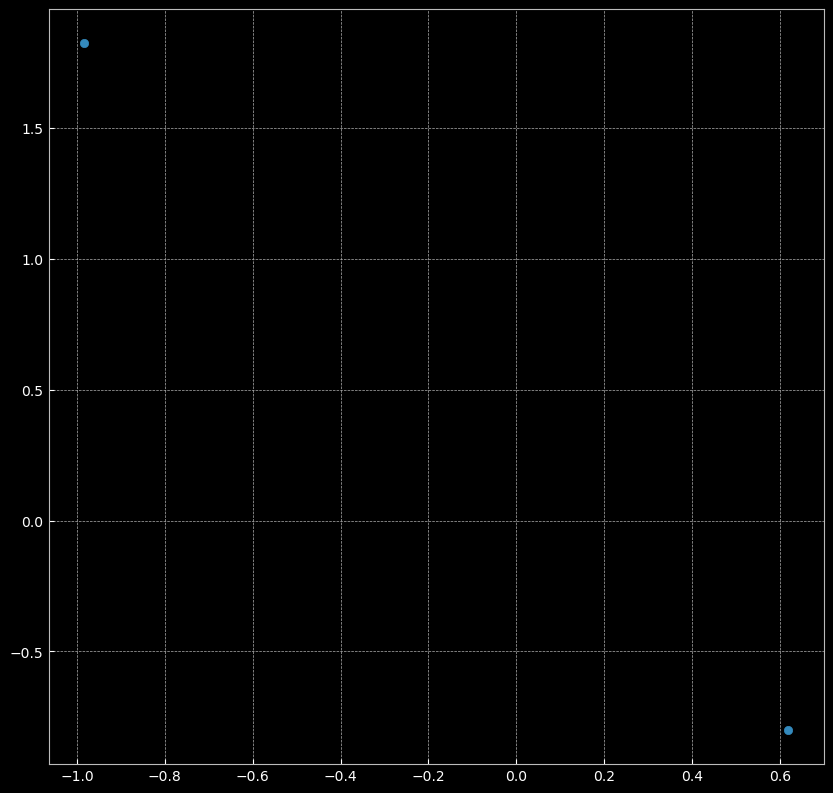

In [23]:
A = torch.randn(2, 2).to(device) 
B = torch.randn(2, 2).to(device)

# matrix-matrix multiplication can be done with "@"
AB = A @ B 

print(A)
print(B)
print(AB)

# Following basis vectors i and j in 2d space
plt.scatter(AB[:, 0], AB[:, 1])
plt.show()

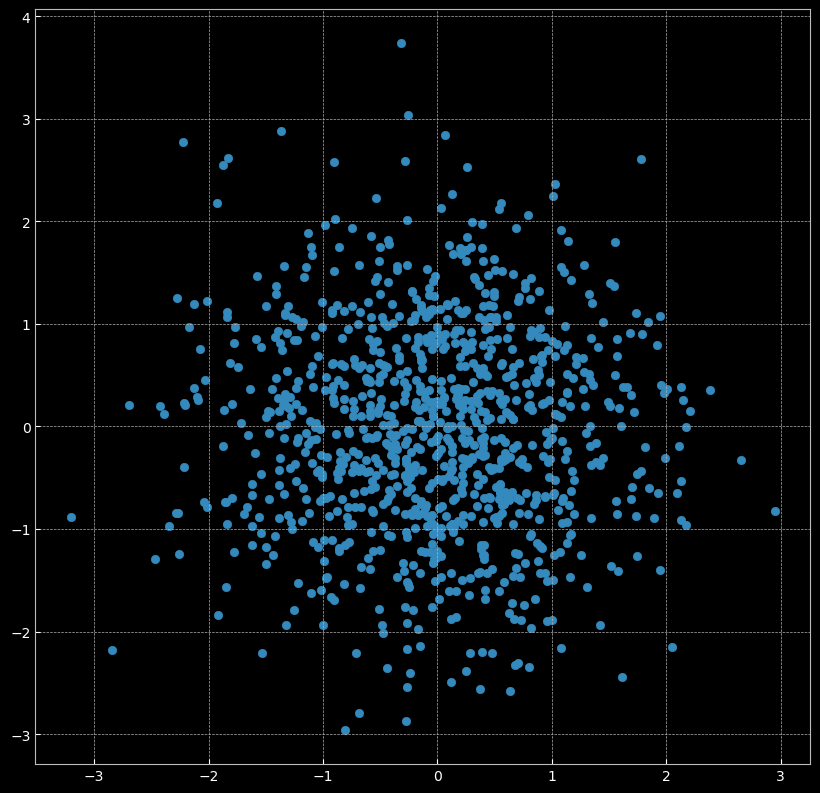

In [9]:
# generate some points in 2-D space
n_points = 1000

# Tensor with random number generation from Gaussian distribution - (1000, 2)
X = torch.randn(n_points, 2).to(device)
colors = X[:, 0]

# Plotting random points
plt.scatter(X[:, 0], X[:, 1])

NameError: name 'OI' is not defined

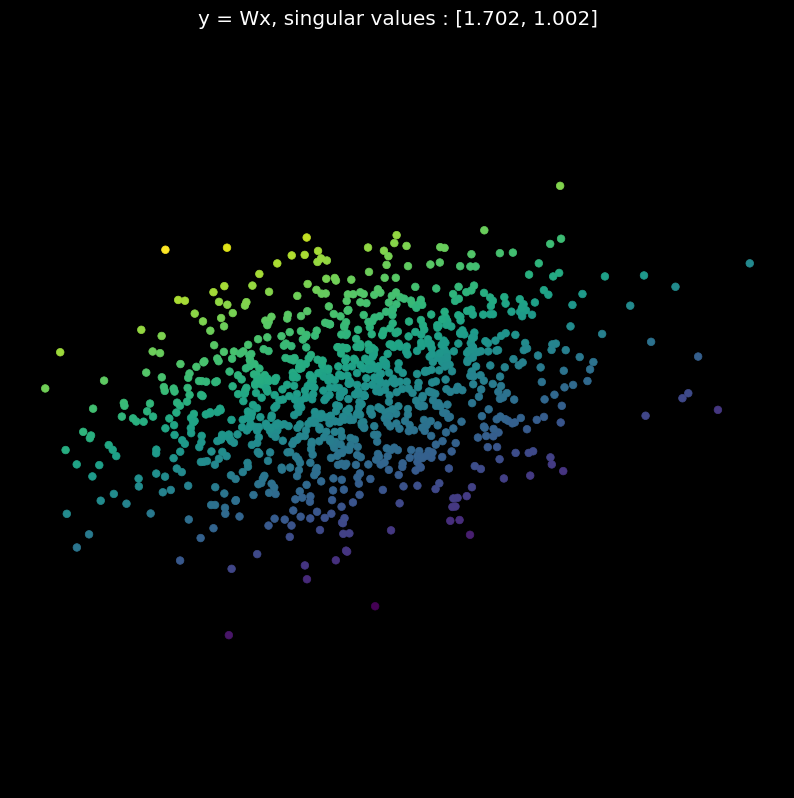

In [10]:
for i in range(10):
    # create a random matrix
    W = torch.randn(2, 2).to(device)
    # transform points - @ represents matrix multiplication in PyTorch
    Y = X @ W.t()
    # compute singular values
    U, S, V = torch.svd(W)
    # plot transformed points
    #plt.scatter(Y[:, 0], Y[:, 1])
    show_scatterplot(Y, colors, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))
    # transform the basis
    new_OI = OI @ W.t()
    # plot old and new basis
    plot_bases(OI)
#    plot_bases(new_OI)

### The Determinant

Linear transformations of matrices and vectors tend to squish or expand space. Determinants measure the factor by which a linear transformation squishes or expands the space. 
 - Namely, the factor by which the areas are scaled (2d)
 - In 3d, the det. tells us the volume rather than the area (2d)

Determinants are also useful in assessing the linear independence of vectors; in solving systems of equations (i.e. if the determinant is zero, it's because the span collapses by one dimension); and in computing eigenvalues.

How are determinants calculated?

* 2 $\times$ 2:     

$$
\det \begin{pmatrix} \begin{bmatrix} a & b \\ c & d \end{bmatrix} \end{pmatrix}
= ad-cb
$$

* 3 $\times$ 3

$$
\det \begin{pmatrix} \begin{bmatrix} a & b & c \\ d & e & f \\ g & h & i \end{bmatrix} \end{pmatrix}
= a \det \begin{pmatrix} e & f \\ h & i \end{pmatrix} - b \det \begin{pmatrix} d & f \\ g & i\end{pmatrix} + c \det \begin{pmatrix} d & e \\ g & h \end{pmatrix}
$$


### Inverse Matrices, Column Space, and Null Space

Matrix Algebra is most useful when solving *linear* systems of equations, such as:

$$
\begin{align}
2x + 4y + -2z &= 3 \\
4x + 9y + -3z &= 8 \\
-2x - 3y + 7z &= 10
\end{align}
$$

Which is simply a list of equations with unkown variables. These linear system of equations can be packaged into a single vector equation where:
 - Matrix contains coefficients $A$
 - Vector contains variables $\hat{x}$
 - Output vector (matrix-vector output) $\hat{b}$

$$
\underbrace{\begin{pmatrix} 2 & 4 & -2 \\ 4 & 9 & -3 \\ -2 & -3 & 7 \end{pmatrix}}_{\mathbf{A}}
\underbrace{\begin{pmatrix} x \\ y \\ z \end{pmatrix}}_{\mathbf{x}} =
\underbrace{\begin{pmatrix} 2 \\ 8 \\ 10 \end{pmatrix}}_{\mathbf{b}}
$$

Intuitively, we are looking for a matrix that transforms $\mathbf{b}$ into $\mathbf{x}$. This reverse transformation is called the **inverse** of $\mathbf{A}$ (or $\mathbf{A}^{-1}$). 

Note that $\mathbf{A}^{-1}\mathbf{A} = \mathbf{I}$, where $\mathbf{I}$ is the **identity matrix**:

$$
\mathbf{I}_{n \times n} =
\begin{pmatrix} 
1 & 0 & ... & 0 \\
0 & 1 & ... & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & ... &1 \\
\end{pmatrix}
$$

Such that

$$
\begin{align}
\mathbf{A} \mathbf{x} &= \mathbf{b} \\
\mathbf{A^{-1}}\mathbf{A}\mathbf{x} &= \mathbf{A^{-1}}\mathbf{b} \\
\mathbf{x} &= \mathbf{A^{-1}}\mathbf{b}
\end{align}
$$